In [2]:
!uv pip install -U tensorflow
#cuda: !uv pip install tensorflow[and-cuda]
!uv pip install -U keras
# visualization tools
!uv pip install -U graphviz

# Win: !winget install graphviz
# Ubuntu/Debian: sudo apt-get install graphviz
# macOS: brew install graphviz

/bin/bash: line 1: uv: command not found
/bin/bash: line 1: uv: command not found
/bin/bash: line 1: uv: command not found


In [3]:
import tensorflow as tf
import keras
print(tf.__version__, keras.__version__)
_ = [print(t,tf.config.list_physical_devices(t)) for t in ['CPU', 'GPU','TPU']]

2.20.0 3.12.0
CPU [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU []
TPU []


[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


/home/admin/_github/massimodipaolo/ai-crash-course/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "simple-linear-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Creating visualization for model: simple-linear-model
Processing input layer...
Processing layer 0: Dense
Visualization saved as 'simple-linear-model.png'


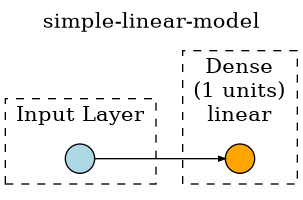

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 18.9059
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.9680
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9026
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.5147
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.6532
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.2005
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0656
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.1775
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.4814
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9343
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5033
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1625
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8920
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6761
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5029
Epoch 16/500
1/1

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from utils import display_nn_graph

x = np.arange(-2.0,5.0,.5,dtype=float)
y = 2*x - 1
print(x,y,sep='\n')

# create a model with one layer and one neuron
model_name = "simple-linear-model"
model = Sequential(name=model_name)
model.add(Dense(1, input_dim=1, activation='linear'))
# draw the model 
model.summary()
# image
display_nn_graph(model,model_name)

model.compile(optimizer='sgd', loss='mean_squared_error')
model.save(f'{model_name}-unfitted.keras')

model.fit(x, y,epochs=500, verbose=1)
model.save(f'{model_name}-fitted.keras')
# make a prediction
p = model.predict(x=np.array([10.0], dtype=float))

print(
    f"{p=}", 
    f"{model.layers[0].get_weights()=}",
    sep='\n')
print("- Open Netron in browser: https://netron.app/")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


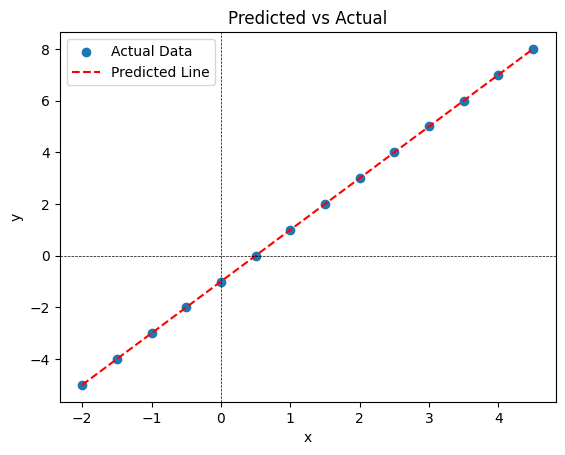

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x, y, label='Actual Data')
plt.plot(x, model.predict(x), color='red', label='Predicted Line', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted vs Actual')
# (0,0)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.legend()
plt.show()